In [1]:
#这里是定义Jupyter Notebook的外观样式
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#16a085', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', 
                        '#16a085', '#138d75', '#117a65', '#0e6655', '#0b5345']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

/tmp/ipykernel_19/2228236448.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


In [2]:
#-U是在升级这个库 -q是减少输出信息,quiet
!pip install -U -q lightautoml==0.3.8b1
!pip install pandas==1.5.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.10.0 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
chex 0.1.84 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
featuretools 1.28.0 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.
fitter 1.6.0 requires joblib<2.0.0,>=1.3.1, but you have joblib 1.2.0 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.4.3 which is incompatible.
libpysal 4.9.2 requires

In [3]:
#https://www.kaggle.com/code/yunsuxiaozi/pss3e24-baseline-optuna-lightgbm
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
import pandas as pd#导入csv文件的库
import numpy as np#进行矩阵运算的库
from datetime import datetime,date#处理日期和时间的类

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML#自动化表格机器学习模型的库
from lightautoml.tasks import Task#定义机器学习任务的库

import tensorflow as tf#导入深度学习框架tensorflow 并命名为tf
import tensorflow_probability as tfp#tensorflow的概率编程库


#设置随机种子,保证模型可以复现
import random
np.random.seed(2023)
random.seed(2023)

import warnings#避免一些可以忽略的报错
warnings.filterwarnings('ignore')#filterwarnings()方法是用于设置警告过滤器的方法，它可以控制警告信息的输出方式和级别。

In [5]:
train_df=pd.read_csv("/kaggle/input/prediction-of-tourist-arrivals/train_df.csv")
print(f"len(train_df):{len(train_df)}")
train_df.head()

len(train_df):132192


,id,date,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,tourism_index,info,event,weather_index
0,0,2018/8/1,1,A,454,A,A,A,13,1750.0,A,A,40.05
1,1,2018/8/1,1,B,823,A,A,A,13,1750.0,A,A,40.05
2,2,2018/8/1,1,C,149,A,A,A,13,1750.0,A,A,40.05
3,3,2018/8/1,1,D,157,A,A,A,13,1750.0,A,A,40.05
4,4,2018/8/1,1,E,14,A,A,A,13,1750.0,A,A,40.05


In [6]:
test_df=pd.read_csv("/kaggle/input/prediction-of-tourist-arrivals/test_df.csv")
print(f"len(test_df):{len(test_df)}")
test_df.head()

len(test_df):13392


,id,date,tourist_area,spot_facility,area,city,type,category,tourism_index,info,event,weather_index
0,145584,2019/7/1,1,A,A,A,A,13,1362,A,A,NaN
1,145585,2019/7/1,1,B,A,A,A,13,1362,A,A,NaN
2,145586,2019/7/1,1,C,A,A,A,13,1362,A,A,NaN
3,145587,2019/7/1,1,D,A,A,A,13,1362,A,A,NaN
4,145588,2019/7/1,1,E,A,A,A,13,1362,A,A,NaN


In [7]:
total_df=pd.concat((train_df,test_df),axis=0)
total_df.drop(['weather_index','id'],axis=1,inplace=True)#暂时不对weather_index做特征工程
print(f"len(total_df):{len(total_df)}")
total_df.head()

len(total_df):145584


,date,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,tourism_index,info,event
0,2018/8/1,1,A,454.0,A,A,A,13,1750.0,A,A
1,2018/8/1,1,B,823.0,A,A,A,13,1750.0,A,A
2,2018/8/1,1,C,149.0,A,A,A,13,1750.0,A,A
3,2018/8/1,1,D,157.0,A,A,A,13,1750.0,A,A
4,2018/8/1,1,E,14.0,A,A,A,13,1750.0,A,A


In [8]:
def create_cat_dict(col):
    #对col这列出现的所有值进行计数并降序排列,返回排序后的索引列表
    val_list = train_df[col].value_counts().sort_values(ascending=False).index
    #打包并创建字典    [a,b,c,d,e]  [0,1,2,3,4]
    return dict(zip(val_list, range(len(val_list))))

area_dic = create_cat_dict('area')
city_dic = create_cat_dict('city')
type_dic = create_cat_dict('type')
category_dic = create_cat_dict('category')
info_dic = create_cat_dict('info')
event_dic = create_cat_dict('event')
for c, dic in zip(['area', 'city', 'type', 'category', 'info', 'event'],
                      [area_dic, city_dic, type_dic, category_dic, info_dic, event_dic]):
        #转成映射,例如'a'->0
        total_df[c] = total_df[c].map(dic).astype('category')

In [9]:
#https://www.kaggle.com/code/wordcards/cv-with-logo
#按照spot_facility的id分在对应的列,具体根据作图发现 tourism_arrival和tourism_index有不算明显的线性关系,并且每个spot_facility都不一样
for i in range(65, 73):
    total_df['tourism_index_'+chr(i)] =(total_df['spot_facility']==chr(i)). astype(int)*total_df['tourism_index']

In [10]:
#类别型变量
cat_features=['tourist_area','spot_facility','area','city','category','info','event','type']
for cat in cat_features:
    cat_data=total_df[cat].unique() 
    for data in cat_data:
        total_df[f"{cat}={data}"]=(total_df[cat]==data).values.astype(np.int64)
    total_df.drop([cat],axis=1,inplace=True)
total_df.head()

,date,tourist_arrivals,tourism_index,tourism_index_A,tourism_index_B,tourism_index_C,tourism_index_D,tourism_index_E,tourism_index_F,tourism_index_G,...,event=3,event=5,event=6,event=4,event=2,type=0,type=1,type=3,type=4,type=2
0,2018/8/1,454.0,1750.0,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2018/8/1,823.0,1750.0,0.0,1750.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2018/8/1,149.0,1750.0,0.0,0.0,1750.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2018/8/1,157.0,1750.0,0.0,0.0,0.0,1750.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2018/8/1,14.0,1750.0,0.0,0.0,0.0,0.0,1750.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
def deal_DATE(df):
    df['date']=pd.to_datetime(df['date'])
    df['day_of_week']=(df['date'].dt.dayofweek.values).astype(np.int64)
    df['is_weekday']=(df['day_of_week']<5)
    df['is_monday']=(df['day_of_week']==0)
    df['is_Tuesday']=(df['day_of_week']==1)
    df['is_Wednesday']=(df['day_of_week']==2)
    df['is_Thursday']=(df['day_of_week']==3)
    df['is_friday']=(df['day_of_week']==4)
    df['is_saturday']=(df['day_of_week']==5)
    df['is_sunday']=(df['day_of_week']==6)
    df['sin_day_of_week']=np.sin(2*np.pi*df['day_of_week']/7)
    df['cos_day_of_week']=np.cos(2*np.pi*df['day_of_week']/7) 
                          
    
    df['month']=(df['date'].dt.month.values).astype(np.int64)
    
    df['spring']=(df['month']>=3)&(df['month']<=5)
    df['summer']=(df['month']>=6)&(df['month']<=8)
    df['fall']=(df['month']>=9)&(df['month']<=11)
    df['winter']=(df['month']>=12)|(df['month']<=2)
    
    df['week_of_year']=(df['date'].dt.isocalendar().week.values).astype(np.int64)
    df['sin_week_of_year']=np.sin(2*np.pi*df['day_of_week']/52)
    df['cos_week_of_year']=np.cos(2*np.pi*df['day_of_week']/52) 
    
    df['day_of_year'] = (df['date'].dt.dayofyear.values).astype(np.int64)
    df['sin_day_of_year']=np.sin(2*np.pi*df['day_of_year']/365)
    df['cos_day_of_year']=np.cos(2*np.pi*df['day_of_year']/365)
    
    df['day_of_month']=(df['date'].dt.day.values).astype(np.int64)
    df['up_of_month']=df['day_of_month']<=10
    df['down_of_month']=df['day_of_month']>=20
    df['sin_day_of_month']=np.sin(2*np.pi*df['day_of_month']/30)
    df['cos_day_of_month']=np.cos(2*np.pi*df['day_of_month']/30)
    
    
    df['quarter'] = (df['date'].dt.quarter.values).astype(np.int64)
    df['sin_quarter']=np.sin(2*np.pi*df['quarter']/4)
    df['cos_quarter']=np.cos(2*np.pi*df['quarter']/4)
                           
    df.drop(['date'],axis=1,inplace=True)
    return df
total_df=deal_DATE(total_df)
train_df=total_df[:len(train_df)]
test_df=total_df[len(train_df):]
train_df.dropna(inplace=True)
del total_df
print(f"total_feature_counts:{len(train_df.keys().values)},len(test_df):{len(test_df)}")

total_feature_counts:173,len(test_df):13392


In [12]:
N_THREADS = 4
N_FOLDS = 5
TEST_SIZE = 0.2
TIMEOUT = 5 * 3600
TARGET_NAME = 'tourist_arrivals'
def RMSE(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))
task = Task('reg', loss = 'mse', metric = RMSE)
roles = {
    'target': TARGET_NAME
}
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': 2023, 'advanced_roles': False}
)
#%%time 
oof_pred = automl.fit_predict(train_df, roles = roles, verbose = 3)
print(automl.create_model_str_desc())
print(f'TRAIN out-of-fold score: {RMSE(train_df[TARGET_NAME].values, oof_pred.data[:, 0])}')

[12:19:44] Stdout logging level is INFO3.
[12:19:44] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[12:19:44] Task: reg

[12:19:44] Start automl preset with listed constraints:
[12:19:44] - time: 18000.00 seconds
[12:19:44] - CPU: 4 cores
[12:19:44] - memory: 16 GB

[12:19:44] Train data shape: (128200, 173)

[12:19:44] Layer 1 train process start. Time left 17999.32 secs
[12:19:46] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[12:19:46] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[12:19:50] Linear model: C = 1e-05 score = -582.7768068403885
[12:19:54] Linear model: C = 5e-05 score = -605.5532840382278
[12:19:57] Linear model: C = 0.0001 score = -610.3661533458397
[12:19:57] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[12:20:01] Linear model: C = 1e-05 score = -580.5227604268506
[12:20:04] Linear model: C = 5e-05 score = -604.3648533592595
[12:20:08] Linear model: C = 0.0001 score 

fast_fi:             Feature    Importance
0    tourism_index_B  1.054881e+11
1      tourism_index  3.033183e+10
2    tourism_index_A  2.493315e+10
3    tourism_index_H  1.811100e+10
4    spot_facility=E  5.867506e+09
5    spot_facility=B  5.369834e+09
6    spot_facility=G  4.248357e+09
7   cos_week_of_year  3.095832e+09
8         is_Tuesday  2.168283e+09
9             type=1  2.156739e+09
10       category=16  2.153759e+09
11            type=2  1.971642e+09
12       day_of_year  1.915898e+09
13   spot_facility=D  1.863381e+09
14   spot_facility=A  1.730259e+09
15   tourist_area=49  1.646224e+09
16        category=7  1.265962e+09
17        category=5  1.262667e+09
18   cos_day_of_week  1.230151e+09
19            area=0  1.116097e+09
20            type=0  8.623738e+08
21      day_of_month  8.414901e+08
22    tourist_area=3  8.345772e+08
23        category=2  8.235901e+08
24   cos_day_of_year  7.867765e+08
25            area=1  7.495301e+08
26   tourism_index_C  7.163067e+08
27          

<Axes: xlabel='Feature'>

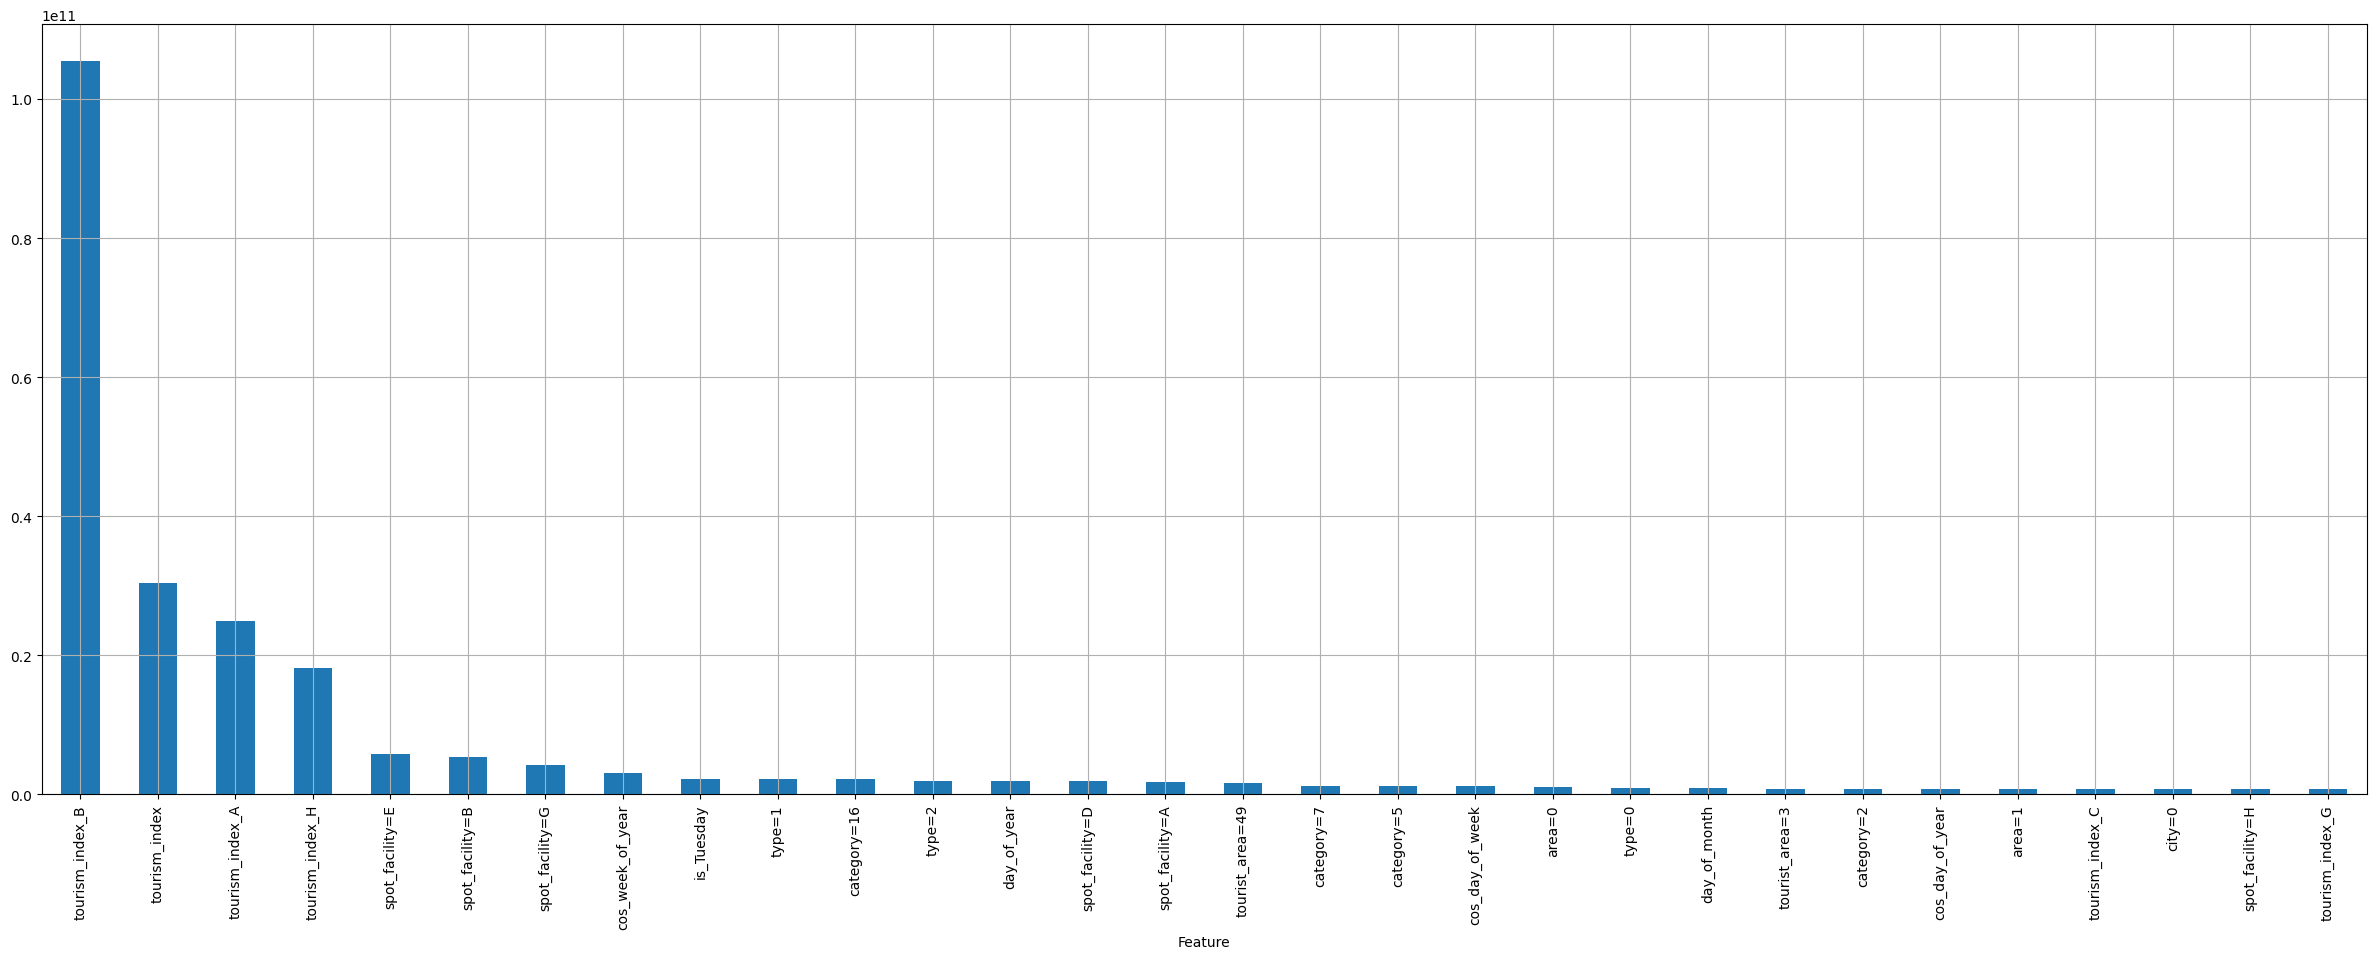

In [13]:
%%time
# 快速获取一些特征重要性
fast_fi = automl.get_feature_scores('fast')[:30]
print(f"fast_fi:{fast_fi}")
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [14]:
# train_df[TARGET_NAME+"_pred"] =automl.predict(train_df).data.T[0]
# test_df[TARGET_NAME+"_pred"] =automl.predict(test_df).data.T[0]

In [15]:
# X=train_df.drop([TARGET_NAME],axis=1).values
# y=train_df[TARGET_NAME].values
# def loss_fn(y_true, y_pred):
#     return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))
# callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
#     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
#     tf.keras.callbacks.TerminateOnNaN()
# ] 
# def create_model():
#     input_layer = tf.keras.Input(shape=(X.shape[1], ))
#     x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
#     x = tf.keras.layers.Dense(16, activation='relu')(x)
#     x = tf.keras.layers.Dense(32, activation='relu')(x)
#     output_layer = tf.keras.layers.Dense(1)(x)    
    
#     model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    
#     model.compile(optimizer=tf.keras.optimizers.Adam(0.02, beta_1=0.5),
#                   loss=loss_fn)
    
#     return model

# model = create_model()
# history = model.fit(X.astype('float32'), y.astype('float32'),
#                     epochs=100,
#                     callbacks=callbacks_list,
#                     validation_split=0.1)

In [16]:
submission=pd.read_csv("/kaggle/input/prediction-of-tourist-arrivals/submission.csv")
#test_X=test_df.drop([TARGET_NAME],axis=1).values
submission[TARGET_NAME] =automl.predict(test_df).data.T[0]#model.predict(test_X)
submission.to_csv('lightautoml_tabularautoml.csv', index = False)
submission.head()

,id,tourist_arrivals
0,145584,447.521393
1,145585,838.643555
2,145586,177.297668
3,145587,156.457001
4,145588,20.977886
